# **Footbal Analysis from Computer Vision and Deep Learning**

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [11]:
drawing = False 
src_x, src_y = -1,-1
dst_x, dst_y = -1,-1

src_list = [];
dst_list = [];


def select_points_src(event,x,y,flags,param):
    global src_x, src_y, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        src_x, src_y = x,y
        cv2.circle(src_copy,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

def select_points_dst(event,x,y,flags,param):
    global dst_x, dst_y, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        dst_x, dst_y = x,y
        cv2.circle(dst_copy,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    
def homography(src, dst):
    src_pts = np.array(src_list).reshape(-1,1,2)
    dst_pts = np.array(dst_list).reshape(-1,1,2)
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    plan_view = cv2.warpPerspective(src, H, (dst.shape[1], dst.shape[0]))
    for i in range(0,dst.shape[0]):
        for j in range(0, dst.shape[1]):
            if(plan_view.item(i,j,0) == 0 and \
               plan_view.item(i,j,1) == 0 and \
               plan_view.item(i,j,2) == 0):
                plan_view.itemset((i,j,0),dst.item(i,j,0))
                plan_view.itemset((i,j,1),dst.item(i,j,1))
                plan_view.itemset((i,j,2),dst.item(i,j,2))
    return plan_view;

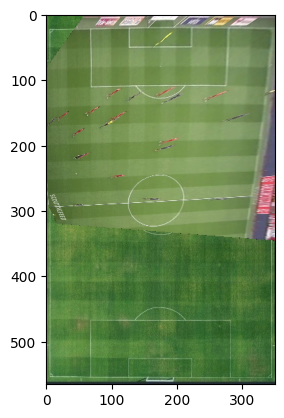

In [12]:
src = cv2.imread('dataset/train/a9f16c_8_3_png.rf.402aca5ae0150e839d310d54d4e85b7c.jpg', -1)
src_copy = src.copy()
cv2.namedWindow('src')
cv2.moveWindow("src", 80,80);
cv2.setMouseCallback('src', select_points_src)

dst = cv2.imread('field.jpg', -1)
dst_copy = dst.copy()
cv2.namedWindow('dst')
cv2.moveWindow("dst", 780,80);
cv2.setMouseCallback('dst', select_points_dst)

while(1):
    cv2.imshow('src',src_copy)
    cv2.imshow('dst',dst_copy)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('s'):
        cv2.circle(src_copy,(src_x,src_y),5,(0,255,0),-1)
        cv2.circle(dst_copy,(dst_x,dst_y),5,(0,255,0),-1)
        src_list.append([src_x,src_y])
        dst_list.append([dst_x,dst_y])
    elif k == 13:
        homography = homography(src,dst)
        plt.figure(figsize=(20,20))
        plt.imshow(cv2.cvtColor(homography, cv2.COLOR_BGR2RGB))
        plt.show()          
    elif k == 27:
        break
    
cv2.destroyAllWindows()